In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = 'Bike-Sharing_hour_data.csv'
rides = pd.read_csv(data_path)

In [4]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
rides.shape

(17379, 17)

### Feature List
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius
- atemp: Normalized feeling temperature in Celsius
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
    - casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

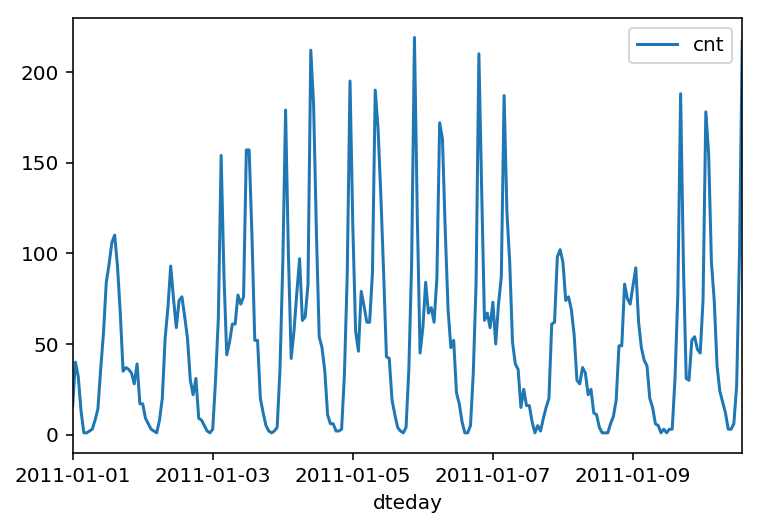

In [6]:
rides[:24*10].plot(x='dteday', y='cnt')
plt.show()

### Dummy variables

In [7]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Feature Scaling

In [8]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [9]:
scaled_features

{'casual': [35.67621842453536, 49.305030387053186],
 'cnt': [189.46308763450142, 181.38759909186527],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'registered': [153.78686920996606, 151.35728591258317],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

In [10]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


### Splitting the data into training, testing, and validation sets

We'll save the data for the last approximately 21 days to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [11]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [12]:
features.shape

(16875, 56)

In [13]:
test_data.shape

(504, 59)

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [14]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [15]:
val_features.shape

(1440, 56)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [17]:
train_features.shape[1]

56

In [18]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=train_features.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal'))

In [19]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                1140      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x=train_features.values, y=train_targets['cnt'].values, batch_size=10, epochs=20, verbose=1,
          validation_data=[val_features.values, val_targets['cnt'].values])

Train on 15435 samples, validate on 1440 samples
Epoch 1/20
15435/15435 [==============================] - 2s - loss: 0.5100 - val_loss: 0.4922
Epoch 2/20
15435/15435 [==============================] - 2s - loss: 0.2946 - val_loss: 0.4398
Epoch 3/20
15435/15435 [==============================] - 1s - loss: 0.2730 - val_loss: 0.4246
Epoch 4/20
15435/15435 [==============================] - 1s - loss: 0.2587 - val_loss: 0.4172
Epoch 5/20
15435/15435 [==============================] - 1s - loss: 0.2499 - val_loss: 0.4099
Epoch 6/20
15435/15435 [==============================] - 2s - loss: 0.2431 - val_loss: 0.4091
Epoch 7/20
15435/15435 [==============================] - 2s - loss: 0.2372 - val_loss: 0.3990
Epoch 8/20
15435/15435 [==============================] - 2s - loss: 0.2301 - val_loss: 0.3867
Epoch 9/20
15435/15435 [==============================] - 2s - loss: 0.2203 - val_loss: 0.3708
Epoch 10/20
15435/15435 [==============================] - 2s - loss: 0.2060 - val_loss: 0.3452


## Check predictions

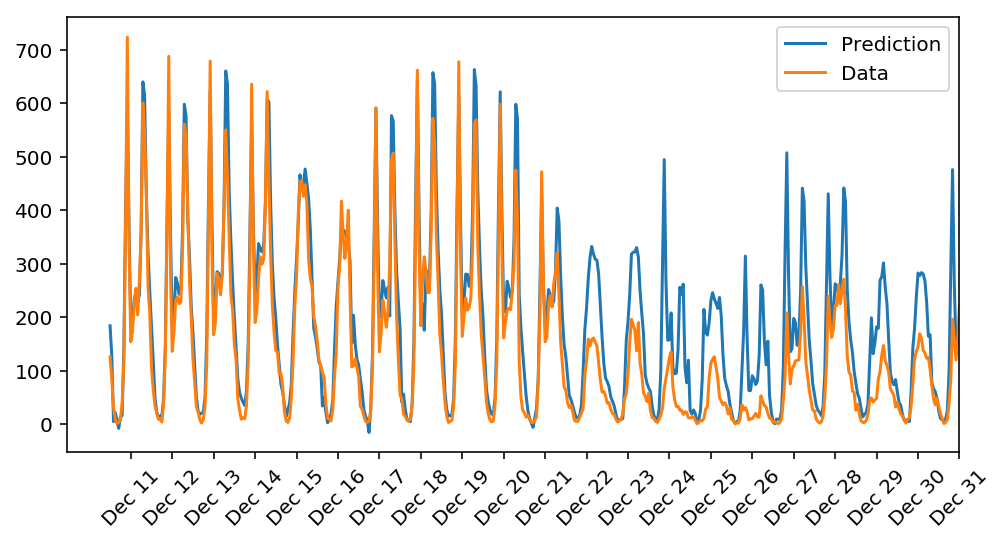

In [22]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
#predictions = network.run(test_features).T*std + mean
predictions = model.predict(test_features.values).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)